In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('Spotify_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64
 8   Acousticness      20594 non-null  float64
 9   Instrumentalness  20594 non-null  float64
 10  Liveness          20594 non-null  float64
 11  Valence           20594 non-null  float64
 12  Tempo             20594 non-null  float64
 13  Duration_min      20594 non-null  float64
 14  Title             20594 non-null  object 
 15  Channel           20594 non-null  object 
 16  Views             20594 non-null  int64 

In [8]:
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,TRUE,TRUE,1040234854,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,TRUE,TRUE,310083733,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,TRUE,TRUE,63063467,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,TRUE,TRUE,434663559,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,TRUE,TRUE,617259738,9.942693,Youtube


In [10]:
# Handle Missing or Incorrect Data

df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_min        0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
EnergyLiveness      2
most_playedon       0
dtype: int64

In [14]:
df['EnergyLiveness']

0         1.150082
1        15.183585
2         7.956897
3        11.546875
4         9.942693
           ...    
20589    11.036949
20590    10.140845
20591     5.389610
20592     7.101852
20593     6.897059
Name: EnergyLiveness, Length: 20594, dtype: float64

In [16]:
# Filling missing values for 'EnergyLiveness' with the median (or drop them)
df['EnergyLiveness'].fillna(df['EnergyLiveness'].median(), inplace = True)

In [25]:
# Convert necessary columns to appropriate data types
df['Duration_min'] = df['Duration_min'].astype(float)
df['Views'] = df['Views'].astype(int)
df['Likes'] = df['Likes'].astype(int)
df['Comments'] = df['Comments'].astype(int)
df['Stream'] = df['Stream'].astype(int)
df['Licensed'] = df['Licensed'].astype(bool)
df['official_video'] = df['official_video'].astype(bool)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64
 8   Acousticness      20594 non-null  float64
 9   Instrumentalness  20594 non-null  float64
 10  Liveness          20594 non-null  float64
 11  Valence           20594 non-null  float64
 12  Tempo             20594 non-null  float64
 13  Duration_min      20594 non-null  float64
 14  Title             20594 non-null  object 
 15  Channel           20594 non-null  object 
 16  Views             20594 non-null  int32 

In [29]:
# analyzing DATA

df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,2.059400e+04,2.059400e+04,2.059400e+04,2.059400e+04,20594.000000
mean,0.620102,0.635176,-7.678254,0.096733,0.291391,0.056162,0.193653,0.530077,120.562616,3.742439,7.827282e+07,6.479902e+05,2.684679e+04,1.282650e+08,5.167138
std,0.165504,0.214274,4.639481,0.112182,0.286117,0.193622,0.168832,0.245542,29.588093,2.085211,2.183232e+08,1.773648e+06,1.911751e+05,2.389642e+08,4.117241
min,0.000000,0.000000,-46.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.146365e+09,0.000000e+00,0.000000e+00,-2.146121e+09,0.000049
25%,0.519000,0.507000,-8.868000,0.035700,0.045200,0.000000,0.094100,0.340000,96.994000,2.996746,1.440883e+06,1.754200e+04,4.060000e+02,1.550947e+07,2.386545
50%,0.638000,0.666000,-6.540500,0.050650,0.193000,0.000002,0.125000,0.538000,119.959000,3.551267,1.307951e+07,1.153155e+05,3.006000e+03,4.713708e+07,4.256881
75%,0.741000,0.798000,-4.935000,0.104000,0.476750,0.000474,0.237000,0.727000,139.923500,4.202163,6.649006e+07,5.000198e+05,1.373675e+04,1.337981e+08,6.821846
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,2.133459e+09,5.078865e+07,1.608314e+07,2.136271e+09,59.113924


1. Danceability:

A. Most songs have a moderate to high danceability score (~62%).
B. min = 0.0000, shows that there are some songs which have 0 danceability.
C. 75% = 0.741000, shows that the top 25% of songs have a danceability score above 0.74, means highly danceable tracks.
            
2. Energy :

A. 25% of the songs have an energy score ≤ 0.507 (low-energy music). energy score more than 0.50 comes for high energetic music.
B. 75% of the songs have an energy level between 0.507 and 1.00.(High energy music).
C. so spotify have 75% of the songs of high energy level which is more than 0.507.
D. min = 0.000020, shows that some songs have very low energy level. (May be aliens sing those song, Ha!, like me.)

In [48]:
# Unique artists
print(df['Artist'].unique())
print("Total Unique Artists:", df['Artist'].nunique())

['Gorillaz' 'Red Hot Chili Peppers' '50 Cent' ... 'LE SSERAFIM' 'ThxSoMch'
 'SICK LEGEND']
Total Unique Artists: 2074


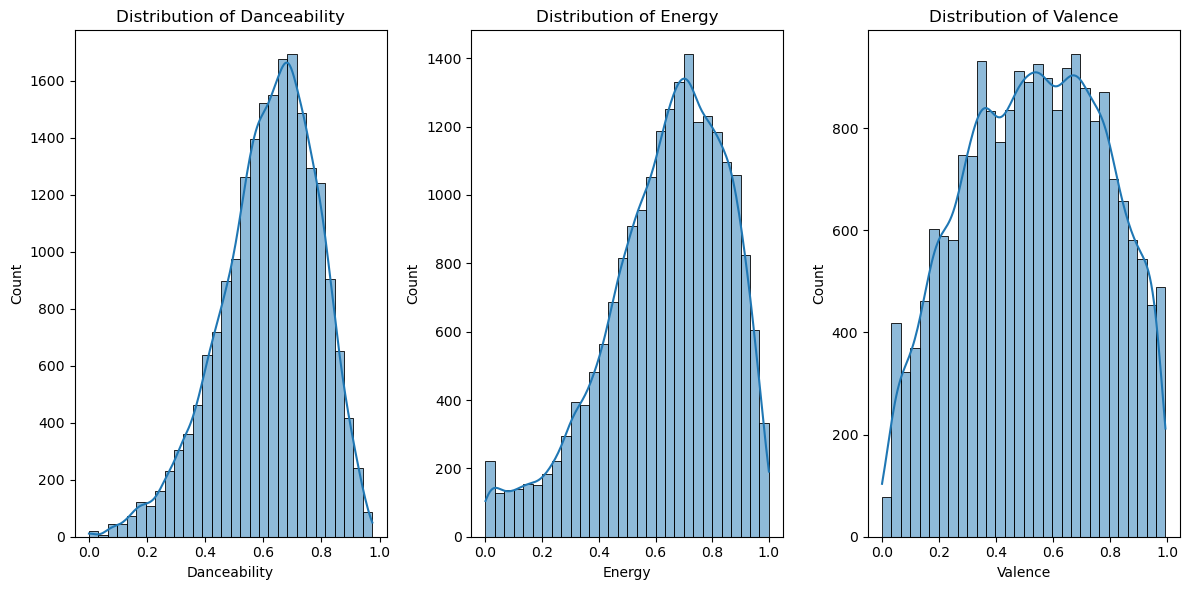

In [64]:
# Visualization

plt.figure(figsize = (12,6))
colm = ['Danceability', 'Energy', 'Valence']
for i, col in enumerate(colm):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# Above are the vizualization of distributions of the three features ('Danceability', 'Energy', 'Valence')

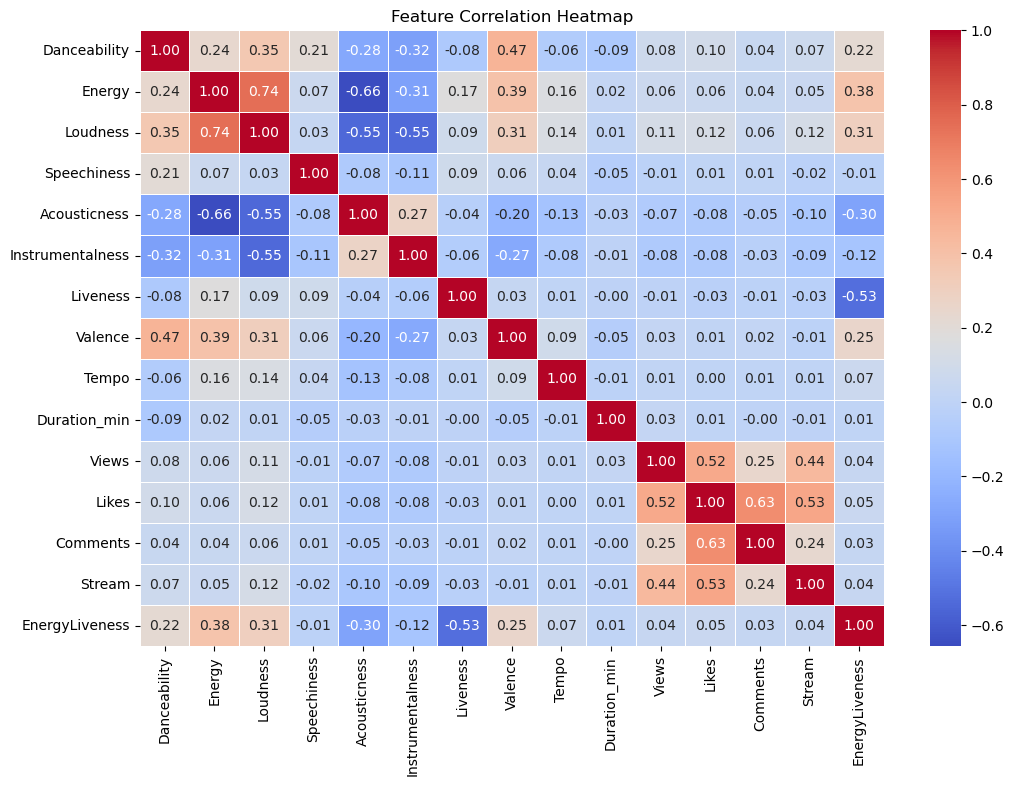

In [76]:
# Seeing the correlation with heatmap between different features

num_var_df = df.select_dtypes(include=[np.number]) # corr() works with only numeric variables not the categorical variables

plt.figure(figsize = (12,8))
sns.heatmap(num_var_df.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### 1. Features-->Energy & Loudness (close to +1) suggest that louder tracks tend to have higher energy. (+ve) corr
#### 2. Acousticness & Energy (close to -1) means acoustic songs are usually low in energy. (-ve) corr
#### 3. Views & Danceability (near 0) indicate that danceability does not directly impact popularity. (No correlation/weak correlation)

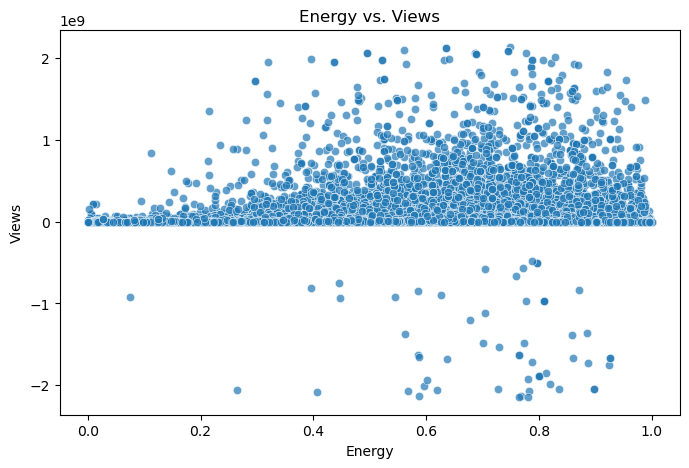

In [79]:
# vizualizing the scatter plot between energy and views, will get to know if high energy in tracks are associated with more views.

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Energy'], y=df['Views'], alpha=0.7)
plt.xlabel("Energy")
plt.ylabel("Views")
plt.title("Energy vs. Views")
plt.show()

##### By seeing the scatter plot above we can generalize that if a song(a dot in graph) gets min view more likely it have low energy level.
##### And most of the songs fall in area where Energy level is high and they have more number of views.
##### So we can understand the popularity of songs with respect to Energy level and  Views.

In [117]:
# Vizualization of the top 10 Most Streamed Artists
top_10_artists = df.nlargest(10, 'Stream')[['Artist', 'Stream']] # nlargest will select the top 10 by stream
print(top_10_artists)

                 Artist      Stream
17860          Dua Lipa  2136270814
140              Khalid  2110573779
18464     Billie Eilish  2110573779
13435             Drake  2102889031
19024      Harry Styles  2096003277
12386        Ed Sheeran  2067689483
7950              Queen  2038872787
43             Coldplay  2030825694
16009  The Chainsmokers  2030825694
13420         Lady Gaga  2004338878


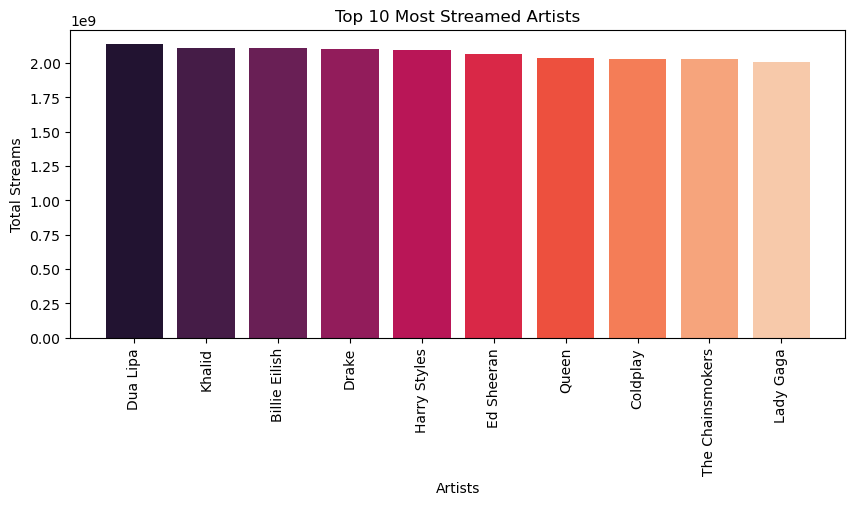

In [123]:
# Vizualize

colors = sns.color_palette("rocket", len(top_10_artists))

plt.figure(figsize=(10,4))
plt.bar(top_10_artists['Artist'], top_10_artists['Stream'], color=colors)
plt.xlabel("Artists")
plt.ylabel("Total Streams")
plt.title("Top 10 Most Streamed Artists")
plt.xticks(rotation=90)
plt.show()

# So here the most streamed artist is Dua Lipa 

In [128]:
# I would like to use plotly for an interactive basic dashboard.

!pip install jupyter-dash dash plotly pandas

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
